In [6]:
import numpy as np
from numpy import expand_dims
from keras.utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from PIL import Image

In [7]:
class FaceDataLoader:
  def __init__(self, input_file):
    self.input_file = input_file
  
  def __len__(self):
    return len(self.input_file)
  
  def __getitem__(self, idx):
    img = load_img(self.input_file)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(
      rotation_range=50,
      width_shift_range=100.0,
      height_shift_range=100.0,
      brightness_range=None,
      fill_mode='nearest',
      cval=0.0,
      horizontal_flip=True,
      vertical_flip=False, ## Change this value to enable random vertical flips
      zoom_range=0.25
    )
    it = datagen.flow(samples, batch_size=1)
    for i in range(9):
      pyplot.subplot(330 + 1 + i)
      batch = it.next()
      image = batch[0].astype('uint8')
      pyplot.imshow(image) ## optional -> showing the images
      im = Image.fromarray(image)
      im.save(f"./Output/augmented_{i}.png")
    pyplot.show()
    return image

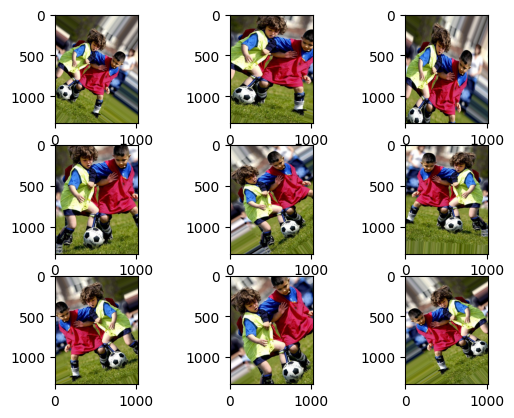

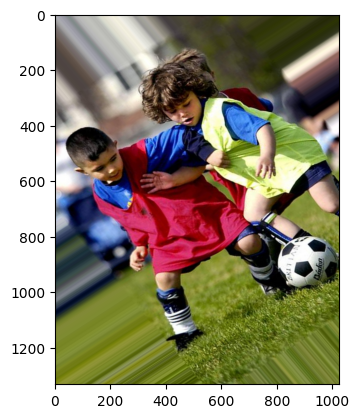

In [8]:
input_file = "./37_Soccer_soccer_ball_37_45.jpg"
face_loader = FaceDataLoader(input_file=input_file)

image_data = face_loader[0]

pyplot.imshow(Image.fromarray(image_data))
pyplot.show()